### Mid Term assessment has 2 assignments:
1. Create a model that predicts the Survival Months of a Breast Cancer patient (dataset - breast_cancer_smonths.csv)
2. Create a model that predicts the Diagnosis (Malign or Benign) of a Breast Cancer patient (dataset - breast_cancer_diagnosis.csv)

In this file you will elaborate assignment 1

Organize your code with titles and subtitles. Write the analysis inside your comments or markdowns.

# Building a Logistic Regression

## Import the relevant libraries

### Simplify the problem

I wanna create a model to predict which one of cell nuclei characteristic of patient might have high probability of getting  M or B cancerous based on given dataset as input.

In this part, you MUST use Logistic Regression and Clusters

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()

## Load the data

In [2]:
data = pd.read_csv('breast_cancer_diagnosis.csv')

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
# Replace all No entries with 0, and all Yes entries with 1
data_copy = data.copy()
data_copy['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
data_copy

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Variables

In [5]:
# Create the dependent variables y for diagnosis
y = data_copy['diagnosis']
# I chose independent variable is perimeter_worst, medically understanding is more likely to cause a breast cancer patient to have M cancerous.
x1 = data_copy['perimeter_worst']
# Then area_worst
x2 = data_copy['area_worst']
# And concave points_mean
x3 = data_copy['concave points_mean']

## Let's plot the data

### Scatter plot

### Perimeter Worst

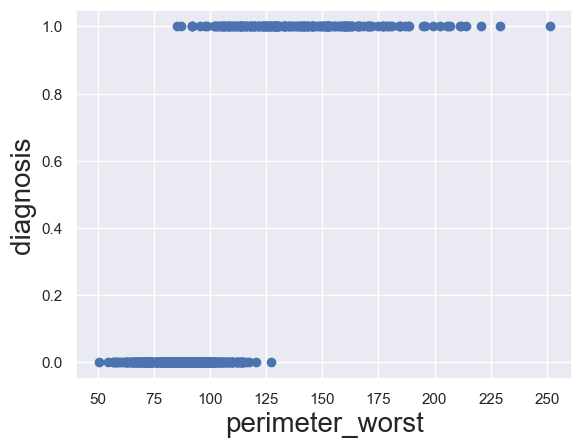

In [6]:
# Create a scatter plot of x1 (perimeter_worst, no constant) and y (diagnosis)
plt.scatter(x1,y, color='C0')
plt.xlabel('perimeter_worst', fontsize = 20)
plt.ylabel('diagnosis', fontsize = 20)
plt.show()


### Area_Worst

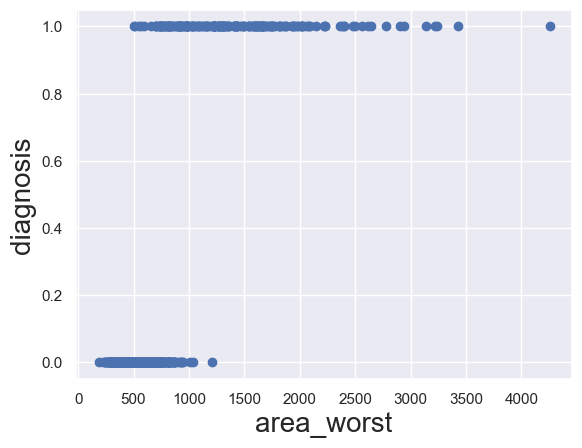

In [7]:
# Create a scatter plot of x2 (area_worst, no constant) and y (diagnosis)
plt.scatter(x2,y, color='C0')
plt.xlabel('area_worst', fontsize = 20)
plt.ylabel('diagnosis', fontsize = 20)
plt.show()


### Concave_points_mean

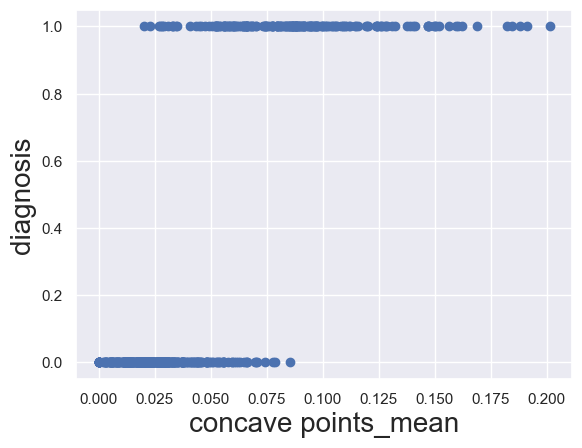

In [8]:
# Create a scatter plot of x3 (concave points_mean no constant) and y (diagnosis))
plt.scatter(x3,y, color='C0')
# Don't forget to label your axes!
plt.xlabel('concave points_mean', fontsize = 20)
plt.ylabel('diagnosis', fontsize = 20)
plt.show()


### Checking Missing values

In [9]:
# I wanna clarify all columns i will use, they won't contain missing values
missing_values1 = data_copy['perimeter_worst'].isna().any()
missing_values2 = data_copy['area_worst'].isna().any()
missing_values3 = data_copy['concave points_mean'].isna().any()
print("Missing values in 'perimeter_mean':", missing_values1)
print("Missing values in 'area_mean':", missing_values2)
print("Missing values in 'Concave_points_mean':", missing_values3)

Missing values in 'perimeter_mean': False
Missing values in 'area_mean': False
Missing values in 'Concave_points_mean': False


### Checking data type of perimeter_mean

In [10]:
# Check the data type of the column
data_type1 = data_copy['perimeter_worst'].dtype
# Check if the data type suggests numerical or categorical data
if data_type1 in (int, float):
    print("Data type of 'perimeter_worst' suggests numerical data.")
elif data_type1 == object:
    print("Data type of 'perimeter_worst' suggests categorical data.")
else:
    print("Data type of 'perimeter_worst' is not clearly numerical or categorical.")

Data type of 'perimeter_worst' suggests numerical data.


### Checking data type of area_mean

In [11]:
# Check the data type of the column
data_type2 = data_copy['area_worst'].dtype
# Check if the data type suggests numerical or categorical data
if data_type2 in (int, float):
    print("Data type of 'area_mean' suggests numerical data.")
elif data_type2 == object:
    print("Data type of 'area_mean' suggests categorical data.")
else:
    print("Data type of 'area_mean' is not clearly numerical or categorical.")

Data type of 'area_mean' suggests numerical data.


### Checking data type of Concave points mean

In [12]:
# Check the data type of the column
data_type2 = data_copy['concave points_mean'].dtype
# Check if the data type suggests numerical or categorical data
if data_type2 in (int, float):
    print("Data type of 'concave points_mean' suggests numerical data.")
elif data_type2 == object:
    print("Data type of 'concave points_mean' suggests categorical data.")
else:
    print("Data type of 'concave points_mean' is not clearly numerical or categorical.")

Data type of 'concave points_mean' suggests numerical data.


### Linear Regression

C:\Users\student.DG0072012\AppData\Local\Temp\ipykernel_21396\3179155492.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat = x1*results_lin.params[1]+results_lin.params[0]


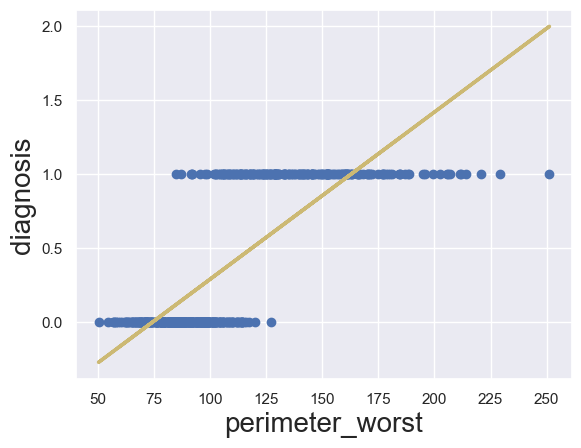

In [13]:
# xp : perimeter_worst
xp = sm.add_constant(x1)
reg_lin = sm.OLS(y,xp)
results_lin = reg_lin.fit()
plt.scatter(x1,y,color = 'C0')
y_hat = x1*results_lin.params[1]+results_lin.params[0]
plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('perimeter_worst', fontsize = 20)
plt.ylabel('diagnosis', fontsize = 20)
plt.show()

C:\Users\student.DG0072012\AppData\Local\Temp\ipykernel_21396\835729399.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat = x2*results_lin.params[1]+results_lin.params[0]


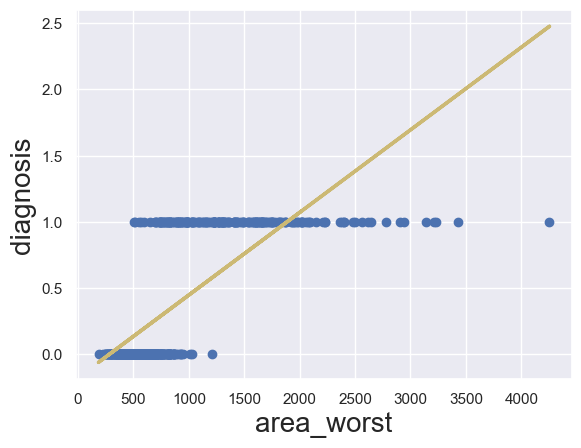

In [14]:
# xa : area_worst
xa = sm.add_constant(x2)
reg_lin = sm.OLS(y,xa)
results_lin = reg_lin.fit()
plt.scatter(x2,y,color = 'C0')
y_hat = x2*results_lin.params[1]+results_lin.params[0]
plt.plot(x2,y_hat,lw=2.5,color='C8')
plt.xlabel('area_worst', fontsize = 20)
plt.ylabel('diagnosis', fontsize = 20)
plt.show()

C:\Users\student.DG0072012\AppData\Local\Temp\ipykernel_21396\273387239.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_hat = x3*results_lin.params[1]+results_lin.params[0]


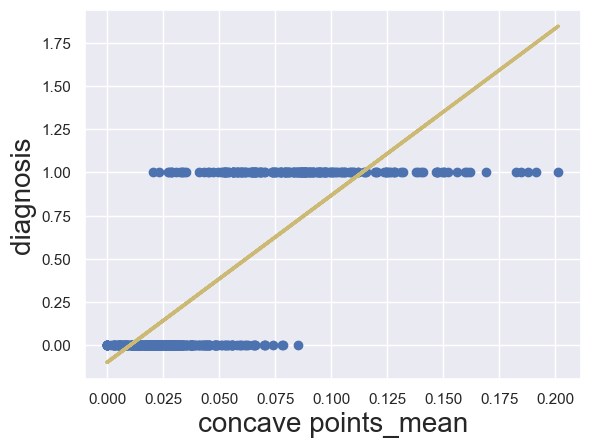

In [15]:
#xc : concave points_mean
xc = sm.add_constant(x3)
reg_lin = sm.OLS(y,xc)
results_lin = reg_lin.fit()
plt.scatter(x3,y,color = 'C0')
y_hat = x3*results_lin.params[1]+results_lin.params[0]
plt.plot(x3,y_hat,lw=2.5,color='C8')
plt.xlabel('concave points_mean', fontsize = 20)
plt.ylabel('diagnosis', fontsize = 20)
plt.show()

### Plot with a logistic regression curve

Optimization terminated successfully.
         Current function value: 0.184077
         Iterations 9


C:\Users\student.DG0072012\AppData\Local\Temp\ipykernel_21396\3410326429.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_sorted = np.sort(f(x1, results_log_perimeter.params[0], results_log_perimeter.params[1]))


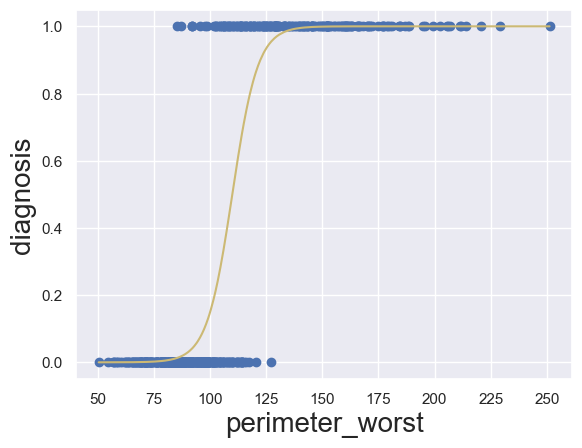

In [16]:
reg_log_perimeter = sm.Logit(y,xp)
results_log_perimeter = reg_log_perimeter.fit()
def f(x,b0,b1):
    # transform linear regression model to logistic by using the formula logistic model func form (probab of event occurring / probab of event not occurring)
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))
f_sorted = np.sort(f(x1, results_log_perimeter.params[0], results_log_perimeter.params[1]))
x_sorted = np.sort(np.array(x1))
plt.scatter(x1,y,color='C0')
plt.ylabel('diagnosis', fontsize = 20)
plt.xlabel('perimeter_worst', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()
#interval between 70 ish to 120 is uncertain values
#perimeter_worst around 110 chances to M is 80%

Optimization terminated successfully.
         Current function value: 0.202671
         Iterations 9


C:\Users\student.DG0072012\AppData\Local\Temp\ipykernel_21396\2994484494.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_sorted = np.sort(f(x2,results_log_area.params[0],results_log_area.params[1]))


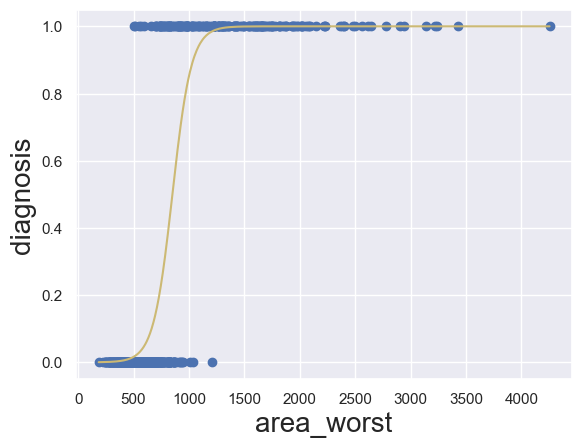

In [17]:
reg_log_area = sm.Logit(y,xa)
results_log_area = reg_log_area.fit()
def f(x,b0,b2):
    # transform linear regression model to logistic by using the formula logistic model func form (probab of event occurring / probab of event not occurring)
    return np.array(np.exp(b0+x*b2) / (1 + np.exp(b0+x*b2)))
f_sorted = np.sort(f(x2,results_log_area.params[0],results_log_area.params[1]))
x_sorted = np.sort(np.array(x2))
plt.scatter(x2,y,color='C0')
plt.ylabel('diagnosis', fontsize = 20)
plt.xlabel('area_worst', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()
#area_worst around 1000  chances to M is 80%

Optimization terminated successfully.
         Current function value: 0.227525
         Iterations 8


C:\Users\student.DG0072012\AppData\Local\Temp\ipykernel_21396\1729755707.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_sorted = np.sort(f(x3,results_log_concave.params[0],results_log_concave.params[1]))


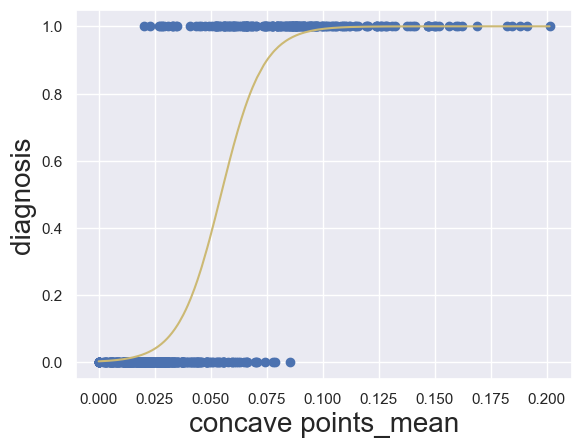

In [18]:
reg_log_concave = sm.Logit(y,xc)
results_log_concave = reg_log_concave.fit()
def f(x,b0,b3):
    # transform linear regression model to logistic by using the formula logistic model func form (probab of event occurring / probab of event not occurring)
    return np.array(np.exp(b0+x*b3) / (1 + np.exp(b0+x*b3)))
f_sorted = np.sort(f(x3,results_log_concave.params[0],results_log_concave.params[1]))
x_sorted = np.sort(np.array(x3))
plt.scatter(x3,y,color='C0')
plt.ylabel('diagnosis', fontsize = 20)
plt.xlabel('concave points_mean', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()
#area_worst around 0.060 chances to M is 80%


In [19]:
results_log_perimeter.summary()
#Log-Likelihood:	-104.74
#compare with area_worst(-115.32) and concave_point_mean(-129.46) likelihood seemed that perimeter_worst has the higher LL(-104.74) means the model fits the data most.

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            1
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                  0.7212
Time:                        21:36:09   Log-Likelihood:                -104.74
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                7.064e-120
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -19.3312      1.890    -10.227      0.000     -23.036     -15.626
perimeter_worst     0.1759      0.018      9.959      0.000       0.141       0.210
===================================================================================
"""

In [20]:
results_log_area.summary()
#Log-Likelihood:-115.32

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            1
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                  0.6931
Time:                        21:36:09   Log-Likelihood:                -115.32
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                2.834e-115
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.9481      0.948    -10.494      0.000     -11.806      -8.090
area_worst     0.0117      0.001      9.795      0.000       0.009       0.014
==============================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [21]:
results_log_concave.summary()
# Log-Likelihood: -129.46 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            1
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                  0.6554
Time:                        21:36:09   Log-Likelihood:                -129.46
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                4.039e-109
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -5.8437      0.480    -12.167      0.000      -6.785      -4.902
concave points_mean   106.9937      9.119     11.733      0.000      89.121     124.866
=======================================================================================
"""

## Looking into LL-null

In [22]:
# 569 is len(length) of y
const = np.ones(569)
const

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [23]:
print ('const len is',len(const))

const len is 569


In [24]:

reg_null = sm.Logit(y,const)
results_null = reg_null.fit()
results_null.summary()
# The Log-Likelihoods of Model 3, Model 2, and Model 1 are all better (less negative) than the LL-Null(Log-Likelihood of a model with no predictors) which is -375.72 .This means that all three models provide a better fit to the data compared to a null model with no predictors.

Optimization terminated successfully.
         Current function value: 0.660316
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      568
Method:                           MLE   Df Model:                            0
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:               1.063e-10
Time:                        21:36:09   Log-Likelihood:                -375.72
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5211      0.087     -6.010      0.000      -0.691      -0.351
==============================================================================
"""

###  Calculating the Accuracy of the Model

#### Accuracy of Perimeter Worst Model

In [25]:
# organize format and compare the actual value with predicted values by the model
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
results_log_perimeter.predict()

array([1.00, 1.00, 1.00, 0.13, 1.00, 0.24, 1.00, 0.53, 0.34, 0.10, 0.92,
       0.99, 1.00, 0.59, 0.45, 0.92, 0.91, 0.99, 1.00, 0.14, 0.08, 0.00,
       0.94, 1.00, 1.00, 1.00, 0.90, 0.99, 1.00, 0.99, 1.00, 0.84, 0.99,
       1.00, 0.98, 0.98, 0.75, 0.01, 0.07, 0.39, 0.21, 0.02, 1.00, 0.64,
       0.31, 1.00, 0.00, 0.22, 0.03, 0.13, 0.01, 0.08, 0.01, 0.99, 0.80,
       0.01, 1.00, 0.73, 0.03, 0.00, 0.00, 0.00, 0.83, 0.00, 0.58, 0.69,
       0.00, 0.00, 0.00, 0.01, 1.00, 0.00, 1.00, 0.52, 0.03, 0.97, 0.04,
       1.00, 1.00, 0.04, 0.01, 0.09, 1.00, 1.00, 0.02, 1.00, 0.43, 1.00,
       0.04, 0.48, 0.23, 0.40, 0.28, 0.10, 0.92, 1.00, 0.01, 0.00, 0.01,
       0.48, 0.44, 0.00, 0.01, 0.00, 0.00, 0.35, 0.01, 0.01, 1.00, 0.01,
       0.00, 0.02, 0.37, 0.00, 0.00, 0.02, 0.00, 0.95, 0.97, 0.97, 0.01,
       1.00, 1.00, 0.22, 0.04, 0.16, 0.64, 1.00, 0.33, 1.00, 0.04, 0.93,
       0.97, 0.68, 1.00, 0.04, 0.02, 0.01, 0.88, 0.00, 0.00, 0.97, 0.01,
       0.10, 0.00, 0.02, 0.04, 0.38, 0.44, 0.10, 0.

In [26]:
#actual data
np.array(data_copy['diagnosis'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [27]:
#create confusion matrix array or table
results_log_perimeter.pred_table()

array([[339.00, 18.00],
       [28.00, 184.00]])

In [28]:
cm_df_p = pd.DataFrame(results_log_perimeter.pred_table())
cm_df_p.columns = ['Predicted 0','Predicted 1']
cm_df_p = cm_df_p.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df_p
# 339 + 184 = 523 model is correct 
# 18 + 28 = 46 model is confused (incorrect)
# Overall the model made an accurate prediction is 91%. [(523-46) * 100 / 523]

,Predicted 0,Predicted 1
Actual 0,339.0,18.0
Actual 1,28.0,184.0


In [29]:
# Create an array (so it is easier to calculate the accuracy)
cm = np.array(cm_df_p)
# Calculate the accuracy of the model
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9191564147627417

#### Accuracy of Area Worst Model

In [30]:
results_log_area.pred_table()

array([[341.00, 16.00],
       [35.00, 177.00]])

In [31]:
cm_df_a = pd.DataFrame(results_log_area.pred_table())
cm_df_a.columns = ['Predicted 0','Predicted 1']
cm_df_a = cm_df_a.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df_a
# 341 + 177 = 518 model is correct 
# 35 + 16 = 51 model is confused (incorrect)
# Overall the model made an accurate prediction is 91%.

,Predicted 0,Predicted 1
Actual 0,341.0,16.0
Actual 1,35.0,177.0


In [32]:
cm = np.array(cm_df_a)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9103690685413005

#### Accuracy of Concave Mean Model

In [33]:
results_log_concave.pred_table()

array([[334.00, 23.00],
       [30.00, 182.00]])

In [34]:
cm_df_c = pd.DataFrame(results_log_concave.pred_table())
cm_df_c.columns = ['Predicted 0','Predicted 1']
cm_df_c = cm_df_c.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df_c
# 334 + 182 = 516 model is correct 
# 30 + 23 = 53 model is confused (incorrect)
# Overall the model made an accurate prediction is 90%.

,Predicted 0,Predicted 1
Actual 0,334.0,23.0
Actual 1,30.0,182.0


In [35]:
cm = np.array(cm_df_c)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9068541300527241

## Conclusion

Final, I can assume that, perimeter_worst and area_worst show positive associations with higher breast cancer risk, with positive coefficients of 0.1759 and 0.0117, respectively.But concave points_mean is the most influential feature, strongly predicting malignant diagnoses with a high coefficient of 106.9937 based on Logit Regression Results above.

Accuracy of perimeter model is 0.9191564147627417 (92%)
Accuracy of area_worst model is 0.9103690685413005 (91%)
Accuracy of area_worst model is 0.9068541300527241 (90%)



### k-means clustering 

In [36]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [37]:
# why ?
x = data.iloc[:,1:11]

In [38]:
x

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809
...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397


In [39]:
kmeans = KMeans(2)

In [40]:
kmeans.fit(x)

c:\Users\student.DG0072012\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [41]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

c:\Users\student.DG0072012\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [42]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Cluster
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


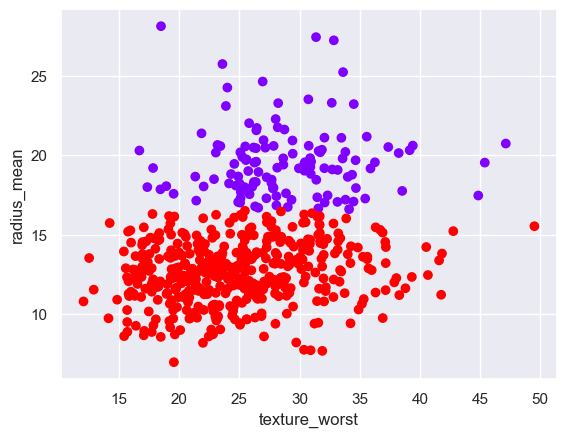

In [43]:
#Creating a scatter plot using the 'texture_worst' and 'radius_mean' columns
plt.scatter(data_with_clusters['texture_worst'],data_with_clusters['radius_mean'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlabel('texture_worst')
plt.ylabel('radius_mean')
plt.show()

In [44]:
#Calculating the within-cluster sum of squares (inertia) for different values of k (number of clusters)
#what ?
kmeans.inertia_

21265324.12061297

In [45]:
# Create an empty list
wcss=[]

# Create all possible cluster solutions with a loop
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

c:\Users\student.DG0072012\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\student.DG0072012\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\student.DG0072012\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\student.DG0072012\AppData\Local\Programs

In [46]:
#what ?
wcss

[70696209.97235793,
 21265324.12061297,
 13185081.023791797,
 7444561.797087959,
 4975139.20218079,
 3621753.3496483983]

Text(0, 0.5, 'Within-cluster Sum of Squares')

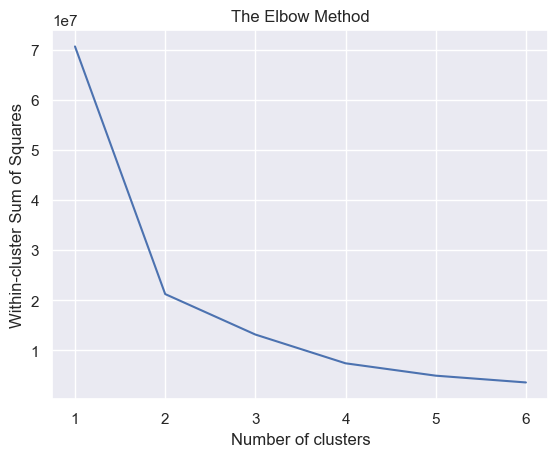

In [47]:
#Plotting the number of clusters 
#what ?
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

## Conclusion

 2 is my optimal number where WCSS starts to slow down.